In [9]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [11]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm
import scipy.integrate as integrate

<h2 style="background-color:lightgreen;color:Blue">Time evolution (sanity check)</h2>
When you have a time dependent hamiltonian, a stationary state no longer exists because one cannot write a time-independent Schrodinger equation by seperating variables anymore. So the way to find energy of the system would be to use the time evoultion operator and evolve the Hamiltonian to any time you want and manually diagonalize it. 
Although I do not understand why, it turns out in this situation, one can write an instantaneous eigenstate equation for the hamiltonian and simply find the eigenvalues of that by putting in the time you want. Below is a code that checks for that. Why does this happen? 

In [14]:
sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, m, t):
    return np.matrix(np.sin(w1*t + phi1)*sigmax + np.sin(w1*t + phi1)*sigmay + (m - 2*np.cos(w1*t + phi1))*sigmaz)
    
def eigv1(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])
    
def eigv2(w1, phi1, m, t):  # not required for now
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - 2*np.cos(w1*t + phi1))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d - d3])

In [13]:
def U(w1, phi1, m, t, dt):
    return expm(-1j* H(w1, phi1, m, t)*dt)

def evolve(w1, phi1, m, dt, T):
    tvals = np.arange(0, T+dt, dt)
    u = np.identity(2)
    for i in tvals:
        u = np.dot(u, U(w1, phi1, m, i, dt))
    return u

In [20]:
u100 = evolve(w1, phi1, m, 0.1, 100)
udagh = np.dot(np.transpose(np.conjugate(u100)), h0)
udaghu = np.dot(udagh, u100)


In [21]:
udaghu

array([[ 0.96466058+0.j        ,  0.26335311+0.00866608j],
       [ 0.26335311-0.00866608j, -0.96466058+0.j        ]])

In [22]:
H(w1, phi1, m, 100)

array([[ 2.       +0.j       ,  0.8660254-0.8660254j],
       [ 0.8660254+0.8660254j, -2.       +0.j       ]])

In [6]:
h0 = H(w1, phi1, m, 0)
u0 = U(w1, phi1, m, 0, 0.1)

In [7]:
hu = np.dot(h0, u0)
h1 = np.dot(np.transpose(np.conjugate(u0)), hu)

In [8]:
h1prime = H(w1, phi1, m, 0.1)

In [9]:
np.dot(h1, h1prime) - np.dot(h1prime, h1)

array([[ 0.        +0.j        , -0.10467191+0.10467191j],
       [ 0.10467191+0.10467191j,  0.        +0.j        ]])

In [13]:
print(h1)
print(      h1prime)

[[-1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j]]
[[-0.99725907+0.j          0.05233596-0.05233596j]
 [ 0.05233596+0.05233596j  0.99725907+0.j        ]]


In [15]:
print(h0)

[[-1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j]]


In [192]:
h0 = H(w1, phi1, w2, phi2, m, 0)
u0 = evolve(H, w1, phi2, w2, phi2, m, 0, 0.1)
print(u0.H @ h0 @ u0)

[[-0.89999865+0.j          0.00134669+0.00078091j]
 [ 0.00134669-0.00078091j  0.89999865+0.j        ]]


In [193]:
print(h0)

[[-0.9+0.j  0. +0.j]
 [ 0. +0.j  0.9+0.j]]


In [194]:
print(H(w1, phi1, w2, phi2, m, 0.1))

[[-0.89985   +0.j          0.00999983-0.01414166j]
 [ 0.00999983+0.01414166j  0.89985   +0.j        ]]


In [4]:
# evolve hamiltonian using evolution operator
band1 = []
band2 = []
tvals = np.arange(0,100,0.1)
w1 = np.pi/6
phi1 = 0
m = 1
dt = 0.1

for i in tvals:
    udag = np.transpose(np.conjugate( U(w1, phi1, m, i, dt) ))
    u = U(w1, phi1, m, i, dt)
    hu = np.dot(H(w1, phi1, m, i), u)
    udhu = np.transpose(np.conjugate(np.dot(udag, hu)))
    eigs = np.sort(la.eigvals(udhu))
    band1.append(eigs[0])
    band2.append(eigs[1])

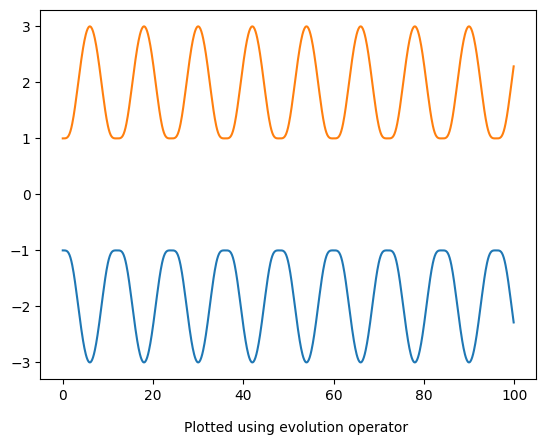

In [279]:
plt.plot(tvals, np.real(band1), label = 'band1')
plt.plot(tvals, np.real(band2), label = 'band2')
plt.figtext(0.35,0,'Plotted using evolution operator')
plt.show()

In [ ]:
band1 = []
band2 = []
tvals = np.arange(0,100,0.1)
w1 = np.pi/6
phi1 = 0
m = 1
dt = 0.1

for i in tvals:
    udag = np.transpose(np.conjugate( U(w1, phi1, m, i, dt) ))
    u = U(w1, phi1, m, i, dt)
    hu = np.dot(H(w1, phi1, m, i), u)
    udhu = np.transpose(np.conjugate(np.dot(udag, hu)))
    eigs = np.sort(la.eigvals(udhu))
    band1.append(eigs[0])
    band2.append(eigs[1])

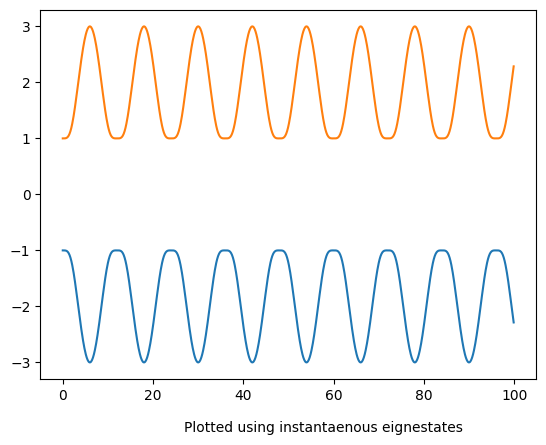

In [280]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, m, i))))
    band1.append(a)
    band2.append(b)
plt.plot(tvals, band1)
plt.figtext(0.35,0,'Plotted using instantaenous eignestates')
plt.plot(tvals, band2)
plt.show()

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


RUN RESET BEFORE GOING TO THE NEXT SECTION PLEASE

<h2 style="background-color:lightgreen;color:blue"">Two-tone qubit <br>Energy dispersion, E vs t (fixed inital phases)</h2>

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm

sigmax = np.array([[0, 1],[1, 0]])
sigmay = np.array([[0, -1j],[1j, 0]])
sigmaz = np.array([[1, 0j],[0, -1]])

def H(w1, phi1, w2, phi2, m, t):
    return (np.sin(w1*t + phi1)*sigmax + np.sin(w2*t + phi2)*sigmay + (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*sigmaz)  #- np.matrix([[(w1+w2)*t, 0], [0, -(w1+w2)*t]])
    
def eigv1(w1, phi1, w2, phi2, m, t):
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.array([d1 - 1j * d2, d + d3])

In [4]:
w1 = 0.1
g = (1+np.sqrt(5))/2
w2 = g*w1
tvals = np.arange(0,100,0.01)
m = 3
phi1 = np.pi/10
phi2 = 0

In [7]:
band1 = []
band2 = []
for i in tvals:
    a, b = np.sort(np.real(la.eigvals(H(w1, phi1, w2, phi2, m, i*(2*np.pi)/w1))))
    band1.append(a/w2)
    band2.append(b/w2)

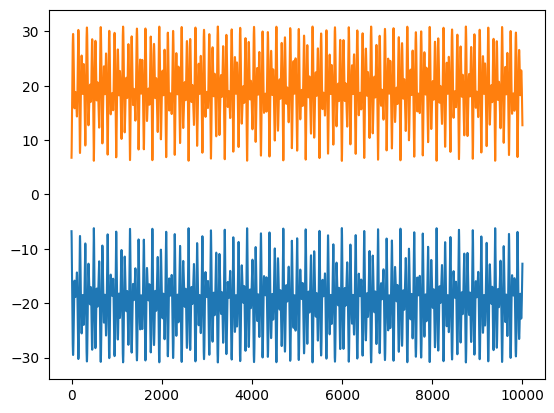

In [8]:
plt.plot(band1)
plt.plot(band2)

In [7]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [ ]:
def ddInt(i, j):
    if i == j:
        return 1
    else:
        return 0
def ddVecs(i, j):
    res = 1
    if len(i) != len(j):
        return 0
    else:
        for a in range(len(i)):
            if i[a] != j[a]:
                res = 0
                break
    return res
def Kn1n2(n1, n2, phi1, phi2, w1, w2, m):
    res1 = (0.5)*(1j*sigmax - sigmaz)*np.exp(-1j*(n1-n2)[0]*phi1) + (0.5)*(-1j*sigmax - sigmaz)*np.exp(-1j*(n2-n1)[0]*phi1) 
    res2 = (0.5)*(1j*sigmay - sigmaz)*np.exp(-1j*(n1-n2)[1]*phi2) + (0.5)*(-1j*sigmay - sigmaz)*np.exp(-1j*(n2-n1)[1]*phi2)
    res3 = (m*sigmaz - (n1[0]*w1 + n1[1]*w2)*ddVecs(n1,n2))
    return res1 + res2 + res3

<hr>
<hr>

In [17]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
from scipy.linalg import expm
import scipy.integrate as integrate

sigmax = np.matrix([[0, 1],[1, 0]])
sigmay = np.matrix([[0, -1j],[1j, 0]])
sigmaz = np.matrix([[1, 0j],[0, -1]])


def H(w1, phi1, w2, phi2, m, t):
    return (np.sin(w1*t + phi1)*sigmax + np.sin(w2*t + phi2)*sigmay + (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))*sigmaz)
    
def U(w1, phi1, w2, phi2, m, t, dt):
    return expm(-1j* H(w1, phi1, w2, phi2, m, t)*dt)

def evolveProds(w1, phi1, w2, phi2, m, dt, T):  # product of infinitesimal evolutoin operators
    tvals = np.arange(0, T, dt)
    u = np.matrix(np.identity(2), dtype=complex)
    for i in tvals:
        # u = np.dot(u, U(w1, phi1, w2, phi2, m, i, dt))
        u = u @ U(w1, phi1, w2, phi2, m, i, dt)
    return u
    
def evolve(ham, w1, phi1, w2, phi2, m, tll, tul):   # evolution from time tll to tul (integrated exponent)
    exp  = np.matrix(np.identity(2), dtype=complex)
    for i in range(2):
        for j in range(2):
            exp[i,j] = integrate.quad(lambda t: ham(w1, phi1, w2, phi2, m, t)[i,j].real, tll, tul)[0] + 1j*integrate.quad(lambda t: ham(w1, phi1, w2, phi2, m, t)[i,j].imag, tll, tul)[0]
    return expm(-1j * exp)

In [19]:
w1 = 0.1
g = np.sqrt(2)
w2 = g*w1
m = 1
phi1 = 0
phi2 = np.pi/10

h0 = H(w1, phi1, w2, phi2, m, 0)
h1 = H(w1, phi1, w2, phi2, m, 1)
print( h0 @ h1 - h1 @ h0)

[[ 0.        -0.06170044j -0.18989444+0.28498844j]
 [ 0.18989444+0.28498844j  0.        +0.06170044j]]


<hr>
<hr>
<h2 style="background-color:red;">Evolution by product of infinitesmial evolution operators, vs Integral of the exponent over a period</h2>
TLDR; Not equal

In [124]:
ev = np.matrix(np.identity(2), dtype=complex)
for i in range(2):
    for j in range(2):
        ev[i,j] = integrate.quad(lambda t: H(w1, 0, w2, 0, m, t)[i, j].real, 0, 1)[0] + 1j*integrate.quad(lambda t: H(w1, 0, w2, 0, m, t)[i, j].imag, 0, 1)[0]
        # ev[i,j] = integrate.quad(lambda t: H(w1, 0, w2, 0, m, t)[i, j], 0, 1)[0]
print(expm(-1j*ev))

[[ 0.62225776+0.77918328j -0.0614576 -0.04349333j]
 [ 0.0614576 -0.04349333j  0.62225776-0.77918328j]]


In [141]:
def evolve(ham, w1, phi1, w2, phi2, m, tll, tul):
    exp  = np.matrix(np.identity(2), dtype=complex)
    for i in range(2):
        for j in range(2):
            exp[i,j] = integrate.quad(lambda t: ham(w1, phi1, w2, phi2, m, t)[i,j].real, tll, tul)[0] + 1j*integrate.quad(lambda t: ham(w1, phi1, w2, phi2, m, t)[i,j].imag, tll, tul)[0]
    return np.matrix(expm(-1j * exp))

In [164]:
evolve(H, w1, 0, w2, 0, m, 0, 0.1)

matrix([[ 9.95952808e-01+0.08987356j, -7.06140822e-04-0.00049932j],
        [ 7.06140822e-04-0.00049932j,  9.95952808e-01-0.08987356j]])

In [165]:
evolveProds(w1, 0, w2, 0, m, 0.01, 0.1)

matrix([[ 9.95952814e-01+0.08987428j, -6.20689524e-04-0.00047037j],
        [ 6.20689524e-04-0.00047037j,  9.95952814e-01-0.08987428j]])

<hr>
<hr>
<h2 style="background-color:lightgreen;color:blue">Two-tone qubit <br>Energy dispersion, E vs \phi (fixed time)</h2>

In [205]:
phi1 = 0
phi2 = 0
dt = 0.1
m = 1
tvals = np.arange(0, 100, dt)

e1 = []
e2 = []
for i in tvals:
    h = H(w1, phi1, w2, phi2, m, i*(2*np.pi)/w1)
    u = evolve(H, w1, phi1, w2, phi2, m, 0, dt)
    udagHu = u.H @ h @ u
    a, b = np.sort(la.eigvals(udagHu))
    e1.append(a)
    e2.append(b)

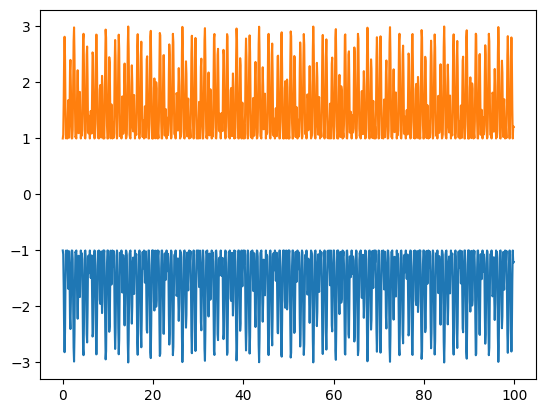

In [206]:
plt.plot(tvals, np.real(e1))
plt.plot(tvals, np.real(e2))

In [2]:
w1 = 0.1
g = 8/5#np.sqrt(2)
w2 = g*w1
tvals = np.arange(0,100,0.01)
m = 3

NameError: name 'np' is not defined

In [299]:
def eigv1(w1, phi1, w2, phi2, m, t):
    d1 = np.sin(w1*t + phi1)
    d2 = np.sin(w1*t + phi1)
    d3 = (m - np.cos(w1*t + phi1) - np.cos(w2*t + phi2))
    d = np.sqrt(d1**2 + d2**2 + d3**2)
    return (1/(np.sqrt(2*d*(d+d3))))*np.matrix([[d1 - 1j * d2], [d + d3]])

In [314]:
phi1vals = np.arange(-np.pi, 50*np.pi, 0.1)
phi2 = 0
phi1 = np.pi/10
dt = 0.1

e1_theta = []
e2_theta = []
for i in phi1vals:
    u = evolve(H, w1, i, w2, phi2, m, 0, dt)
    expE_i = eigv1(w1, i - w1*dt, w2, phi2 - w2*dt, m, 0).H @ u @  eigv1(w1, i, w2, phi2, m, 0)
    e1_theta.append(np.angle(expE_i[0,0])/dt)
    e2_theta.append(-np.angle(expE_i[0,0])/dt)

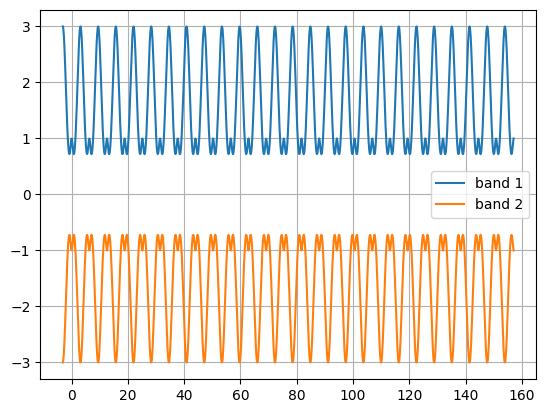

In [315]:
plt.plot(phi1vals, e1_theta)
plt.plot(phi1vals, e2_theta)
plt.legend(["band 1", "band 2"])
plt.grid()
plt.show()

In [1]:
de1 = [(e1_theta[i+1] - e1_theta[i])/0.1 for i in range(len(phi1vals)-1)]
de2 = [(e2_theta[i+1] - e2_theta[i])/0.1 for i in range(len(phi1vals)-1)]

NameError: name 'phi1vals' is not defined

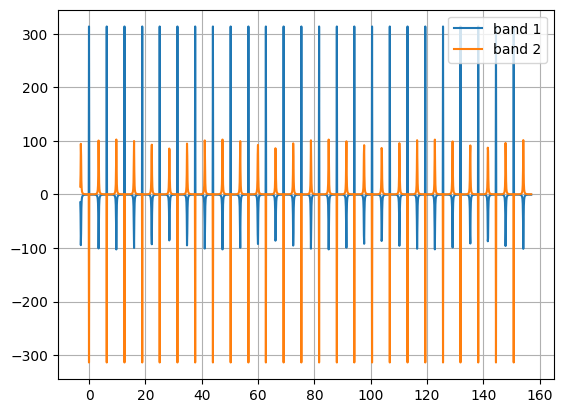

In [291]:
plt.plot(phi1vals[:len(phi1vals)-1], de1)
plt.plot(phi1vals[:len(phi1vals)-1], de2)
plt.legend(["band 1", "band 2"])
plt.grid()
plt.show()